# IT'S ABOUT TIME (AND ICE CREAM)
**_Enough with car prices already, I'm hungry_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 8: Time Series Analysis
#### Leo Salemann, 3/1/18


# First, a Bit of Prep Work

## Helper Functions

In [1]:
## Decomposition of the time series into components
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

In [2]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

In [3]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.diff <- function(ts, lag = 1){
  diff(ts, lag = lag)
}

In [4]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

In [5]:
## Function for ARIMA model estimation
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

## Load Data, Peek at Some Rows

In [6]:
getwd()
Dairy = read.table('CADairyProduction.csv', sep =",", header = TRUE)
head(Dairy)
tail(Dairy)

[1] "/home/vagrant/git/UW_DataScience/Q2/HW08"

Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995,May,4.470,73.730,2.227,0.8967,5,25,125
1995,Jun,4.238,77.994,2.124,0.9160,6,36,216


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
223,2013,Jul,2.433,84.026,3.373,1.6923,223,49729,11089567
224,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424
225,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625
226,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176
227,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083
228,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352


**Data is monthly, runs from Jan 1995 to Dec 2013**

In [7]:
cat(2013-1994 , " years\n")
cat(12*(2013-1994), "months")

19  years
228 months

# Sationary & Seasonality

##  First Look

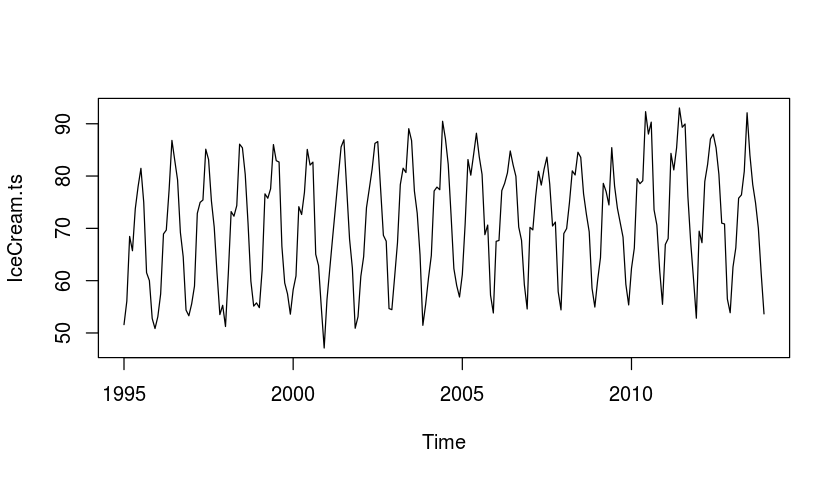

In [8]:
IceCream.ts     = ts(Dairy[,4], start = 1995, freq = 12)
options(repr.pmales.extlot.width=8, repr.plot.height=4)
plot(IceCream.ts)

### So far, it's ..
|          |           |
|----------|-----------|
|Seasonal? |pretty sure|
|Sationary?|don't know |

** Strong seasonal component in Ice Cream**

# Decompose & Dive Deeper

## Separate Time Series into Seasonal, Trend, Residual Components

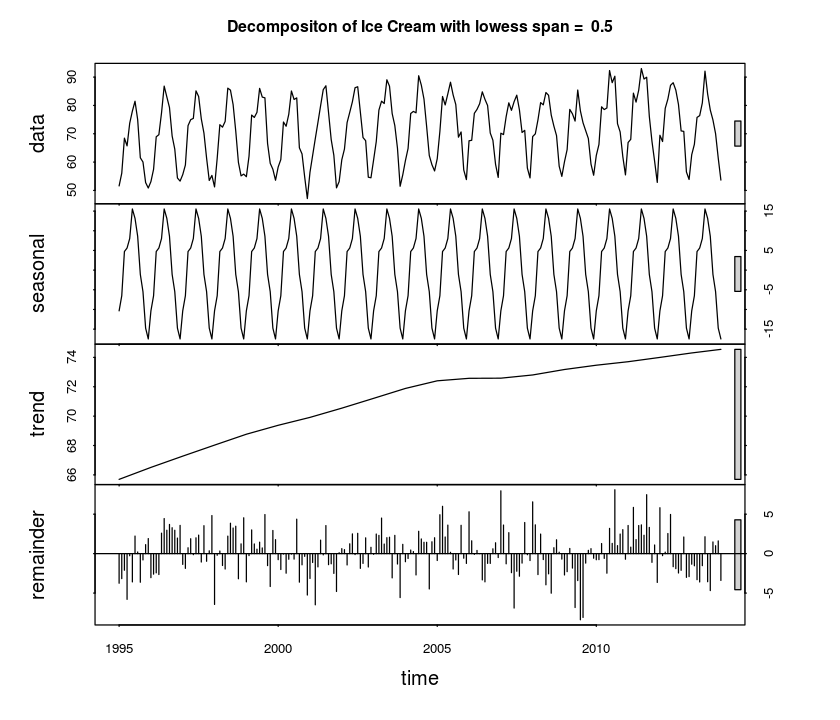

In [9]:
options(repr.pmales.extlot.width=2, repr.plot.height=6)

IceCream.decomp = ts.decomp(IceCream.ts, col= "Ice Cream", 
                            Mult = TRUE, is.df = FALSE)

- **Strong trend component, can't be stationary. **
- **Remainder seems to have a bit of a seasonal pattern left in it.**

### So now, it's ..
|          |           |
|----------|-----------|
|Seasonal? |gotta be      |
|Sationary?|don't tnink so|

## Check out the Autocorrelation (ACF/PACF)

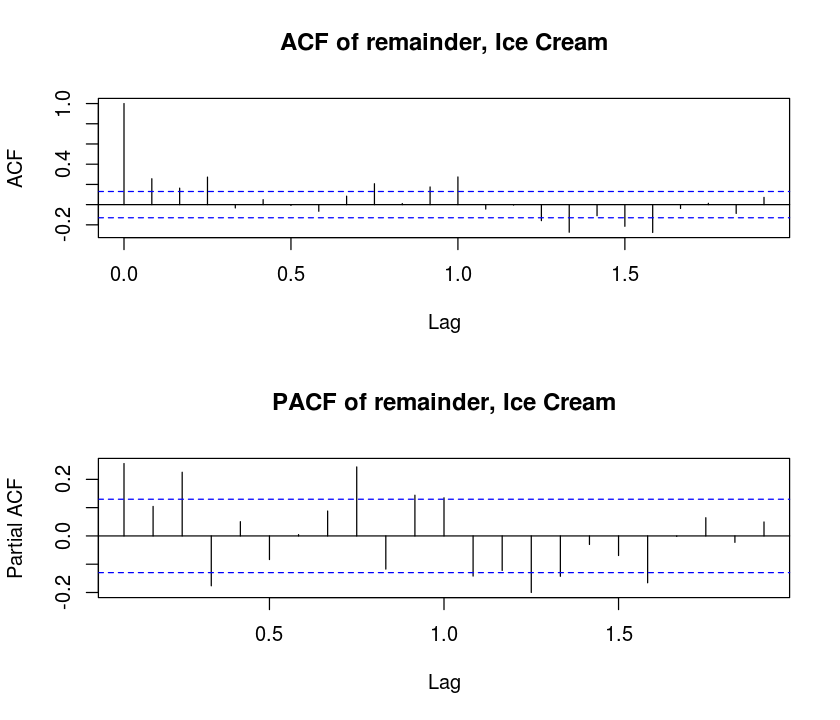

In [10]:
options(repr.pmales.extlot.width=8, repr.plot.height=6)
plot.acf(IceCream.decomp[, 3], col = "remainder, Ice Cream", is.df = FALSE)

- **ACF crosses the 95% confidence interval for multiple lags    **
- **PACF crosses the 95% confidence interval for more than one lag**

## Conclusion
### - Seasonal: YES
### - Sationary: NO

# ARMA Analysis

** Handy Helper Function to "sweep" the p and q values **

In [11]:
arma.sweep = function(residuals, name){
  for (p in c(0,1,2)){
      for (q in (c(0,1,2))){
          cat("\n-----------------< order = c(",p,",0,",q,") >-----------------")
          ts.model(residuals, col = paste('ARIMA model for',name), order = c(p,0,q))
          # col = paste('ARIMA model for',name)
          #cat(name)

      }
  }
}

** On with the analysis **

In [12]:
arma.sweep(IceCream.decomp[, 3], "Ice Cream")


-----------------< order = c( 0 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 8.55:  log likelihood = -568.16,  aic = 1138.31

-----------------< order = c( 0 ,0, 1 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2440
s.e.  0.0685

sigma^2 estimated as 8.05:  log likelihood = -561.32,  aic = 1126.63

-----------------< order = c( 0 ,0, 2 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2
      0.2227  0.0441
s.e.  0.0833  0.0910

sigma^2 estimated as 8.042:  log likelihood = -561.2,  aic = 1128.39

-----------------< order = c( 1 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.2586
s.e.  0.0642

sigma^2 estimated as 7.981:  log likelihood = -560.34,  aic = 1124.68

-----------------< order = c( 1 ,0, 1 ) >-----------------
Call

### For Ice Cream, $(p=2, q=2)$ had the best (lowest) AIC, but $(p=2, q=0)$ has better standard error on the coefficients

# 12 Month Forecast

** Use ($p=2, q=0$) based on ARMA Analysis **

In [13]:
require(forecast)
fit.IceCream = auto.arima(IceCream.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=1, max.q=0,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=1, max.Q=0)
summary(fit.IceCream )

Loading required package: forecast


Series: IceCream.ts 
ARIMA(2,0,0)(2,1,0)[12] with drift 

Coefficients:
         ar1     ar2     sar1     sar2   drift
      0.2067  0.1563  -0.2912  -0.2633  0.0389
s.e.  0.0672  0.0675   0.0689   0.0709  0.0185

sigma^2 estimated as 10.09:  log likelihood=-554.84
AIC=1121.67   AICc=1122.07   BIC=1141.92

Training set error measures:
                     ME    RMSE      MAE         MPE     MAPE      MASE
Training set 0.04521642 3.05555 2.367351 -0.04268173 3.352427 0.8577057
                    ACF1
Training set -0.04925048


**Standard Error for the coefficients all an order of magnitude smaller the coefficients themselves (setting max.d = maxD = 1 helps)**

In [14]:
## Make the forecast for the next year
IceCream.forecast = forecast(fit.IceCream , h=12)

In [15]:
IceCream.summary = summary(IceCream.forecast)


Forecast method: ARIMA(2,0,0)(2,1,0)[12] with drift

Model Information:
Series: IceCream.ts 
ARIMA(2,0,0)(2,1,0)[12] with drift 

Coefficients:
         ar1     ar2     sar1     sar2   drift
      0.2067  0.1563  -0.2912  -0.2633  0.0389
s.e.  0.0672  0.0675   0.0689   0.0709  0.0185

sigma^2 estimated as 10.09:  log likelihood=-554.84
AIC=1121.67   AICc=1122.07   BIC=1141.92

Error measures:
                     ME    RMSE      MAE         MPE     MAPE      MASE
Training set 0.04521642 3.05555 2.367351 -0.04268173 3.352427 0.8577057
                    ACF1
Training set -0.04925048

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       64.79612 60.72559 68.86666 58.57077 71.02147
Feb 2014       67.31042 63.15387 71.46696 60.95353 73.66730
Mar 2014       78.82323 74.58847 83.05800 72.34672 85.29974
Apr 2014       78.51111 74.26580 82.75641 72.01848 85.00373
May 2014       82.97162 78.72214 87.22110 76.47260 89.47064
Jun 2014       92.93832 88.68798 97.1

**Add a "delta" column**

In [16]:
IceCream.summary[,6] = 
    IceCream.summary[,5] - IceCream.summary[,4]
colnames(IceCream.summary)[6] = "delta 95"

** Add D/F (delta 95/Point Forecast) column **

In [17]:
IceCream.summary[,7] = 
    IceCream.summary[,6] / IceCream.summary[,1]
colnames(IceCream.summary)[7] = "D/F"

** Have a look **

In [18]:
IceCream.summary

,Point Forecast,Lo 80,Hi 80,Lo 95,Hi 95,delta 95,D/F
Jan 2014,64.79612,60.72559,68.86666,58.57077,71.02147,12.45070,0.1921519
Feb 2014,67.31042,63.15387,71.46696,60.95353,73.66730,12.71378,0.1888827
Mar 2014,78.82323,74.58847,83.05800,72.34672,85.29974,12.95302,0.1643300
Apr 2014,78.51111,74.26580,82.75641,72.01848,85.00373,12.98525,0.1653939
May 2014,82.97162,78.72214,87.22110,76.47260,89.47064,12.99804,0.1566564
Jun 2014,92.93832,88.68798,97.18867,86.43798,99.43866,13.00068,0.1398850
Jul 2014,86.18309,81.93248,90.43369,79.68235,92.68383,13.00148,0.1508588
Aug 2014,82.20626,77.95560,86.45693,75.70543,88.70710,13.00167,0.1581591
Sep 2014,75.82088,71.57019,80.07156,69.32001,82.32174,13.00172,0.1714795
Oct 2014,70.05507,65.80439,74.30576,63.55421,76.55594,13.00174,0.1855931


### Confidence Interval Assessment
- 95% Confidence Interval width (delta 95) is about 20% of the Forecast
  - Seems a bit sloppy
- 95% Confidence Interval width drops Jan-Jun, then icks up Jul-Dec
  - Easier to predict for warm months, I guess

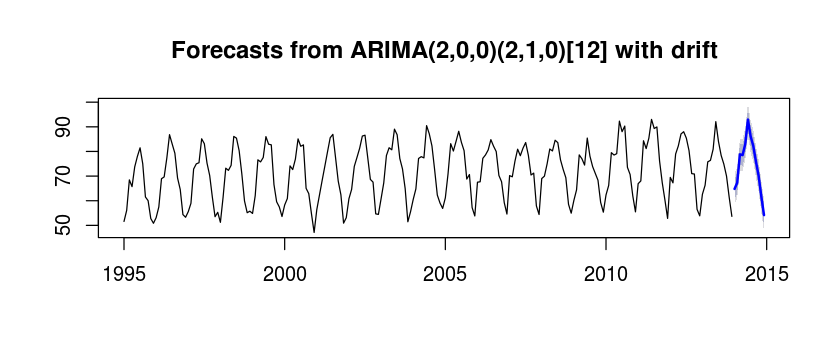

In [19]:
options(repr.pmales.extlot.width=8, repr.plot.height=3)
plot(IceCream.forecast)

** Plot looks pretty good, at this scale, but would probalby look fuzzier if I could zoom in on 2010-2015**